In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error,
    accuracy_score, recall_score, precision_score,
    f1_score, confusion_matrix, make_scorer,
    classification_report, r2_score
)
from scipy.stats import ttest_rel
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Carregar o ficheiro CSV
df = pd.read_csv("../data/AIRPOL_data.csv", delimiter=';', decimal=',')

df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

print("Dimensão do dataset:", df.shape)

display(df.head(5))

display(df.describe(include='all'))

Dimensão do dataset: (49140, 8)


,Country,NUTS_Code,Air_Pollutant,Outcome,Affected_Population,Populated_Area[km2],Air_Pollution_Average[ug/m3],Value
0,Albania,AL,NO2,Asthma,2337443.0,11299.0,5.5,103.0
1,Albania,AL,PM2.5,Asthma,456076.0,11299.0,11.3,231.0
2,Albania,AL0,NO2,Asthma,2337443.0,11299.0,5.5,103.0
3,Albania,AL0,PM2.5,Asthma,456076.0,11299.0,11.3,231.0
4,Albania,AL03,PM2.5,Asthma,149508.0,4041.5,11.3,69.0


,Country,NUTS_Code,Air_Pollutant,Outcome,Affected_Population,Populated_Area[km2],Air_Pollution_Average[ug/m3],Value
count,49140,49140,49140,49140,4.914000e+04,4.914000e+04,49140.000000,49140.000000
unique,42,1755,3,6,NaN,NaN,NaN,NaN
top,Germany,BA,PM2.5,Asthma,NaN,NaN,NaN,NaN
freq,13224,116,29682,10254,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,1.023692e+06,6.534426e+03,15.138166,366.798657
std,NaN,NaN,NaN,NaN,9.085726e+06,5.661679e+04,22.579360,5494.481929
min,NaN,NaN,NaN,NaN,2.674000e+03,2.000000e+00,0.100000,0.000000
25%,NaN,NaN,NaN,NaN,1.069040e+05,5.697000e+02,7.200000,3.000000
50%,NaN,NaN,NaN,NaN,2.388280e+05,1.340100e+03,8.900000,23.000000
75%,NaN,NaN,NaN,NaN,5.988800e+05,4.215200e+03,11.400000,112.000000


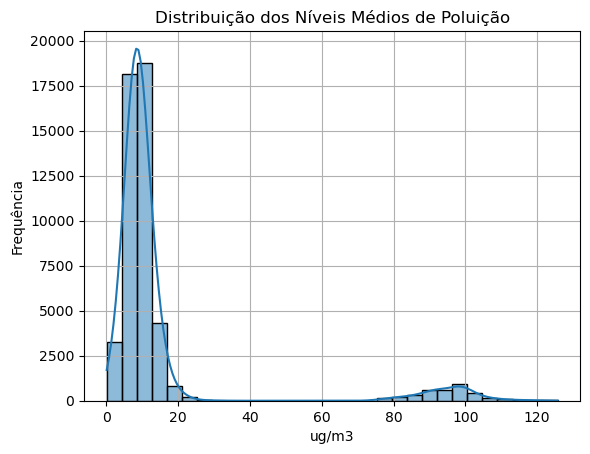

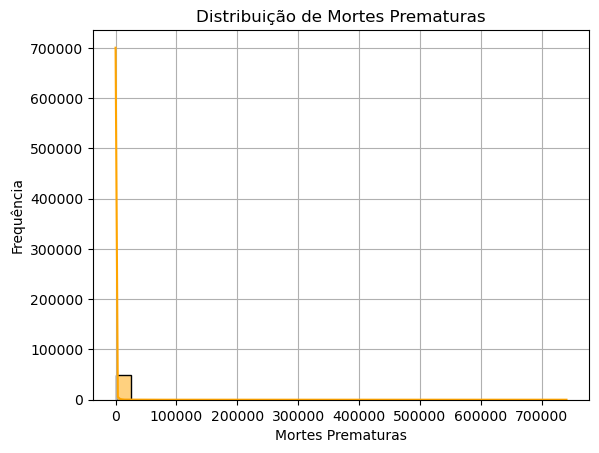

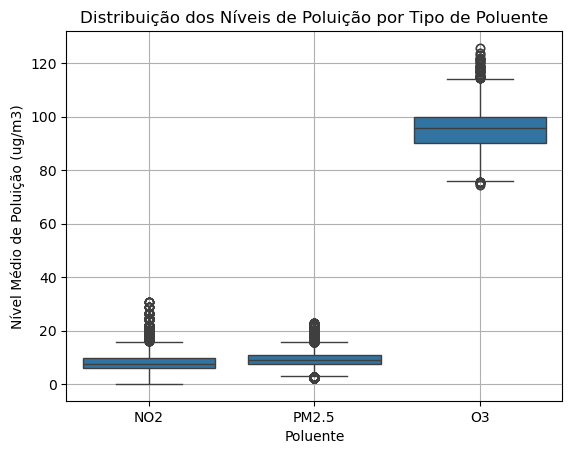

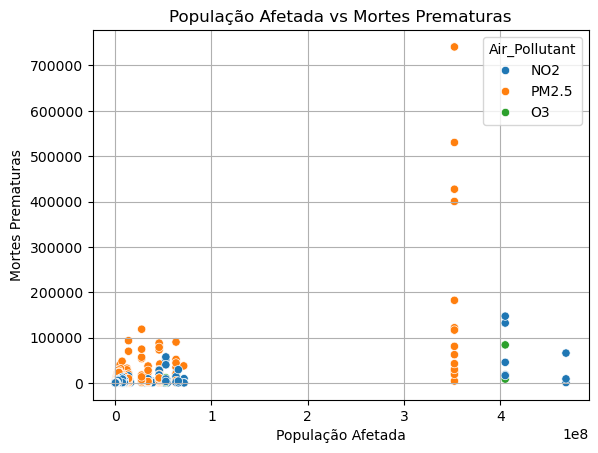

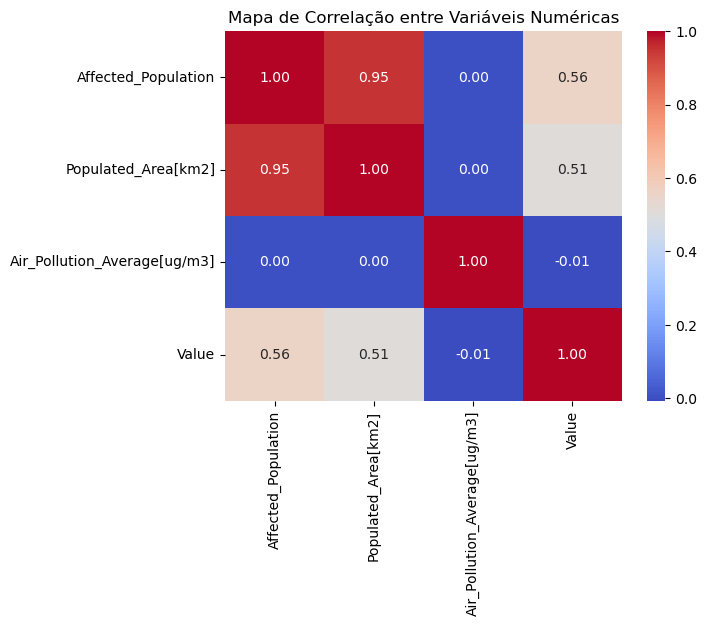

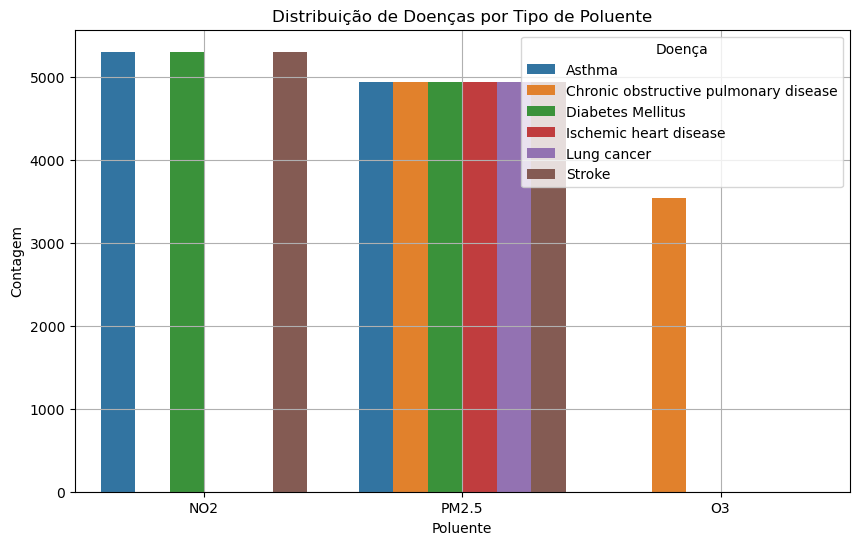

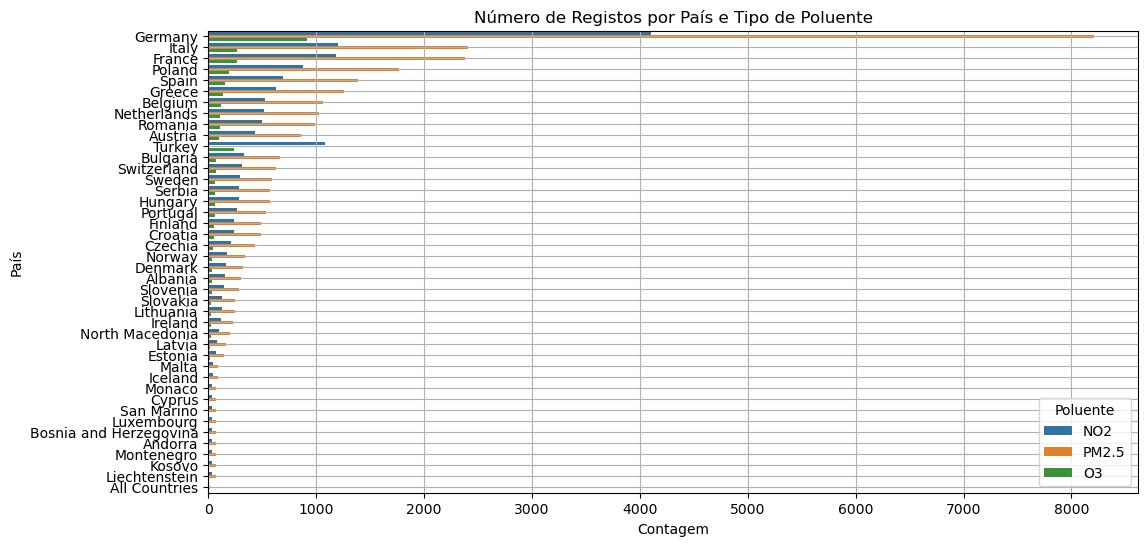

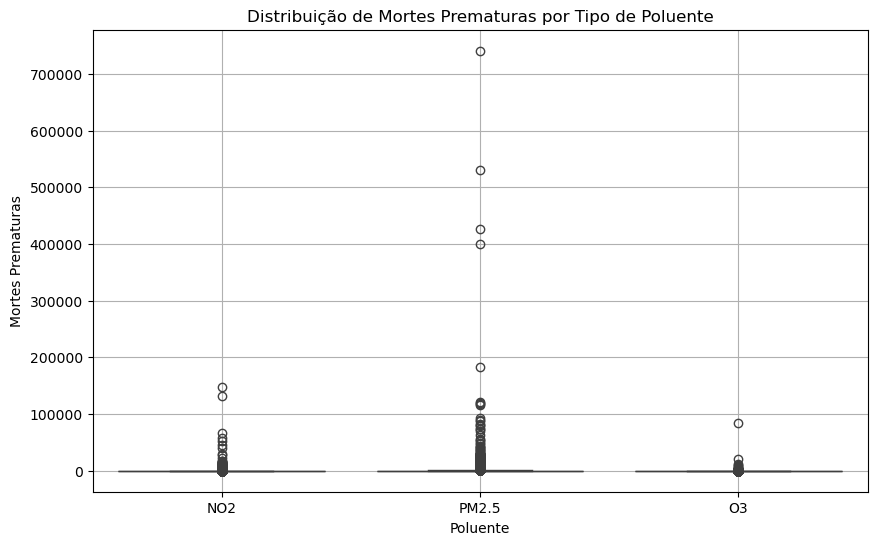

In [18]:
# 1. Histograma dos níveis médios de poluição
sns.histplot(df['Air_Pollution_Average[ug/m3]'], kde=True, bins=30)
plt.title('Distribuição dos Níveis Médios de Poluição')
plt.xlabel('ug/m3')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# 2. Histograma das mortes prematuras
sns.histplot(df['Value'], kde=True, bins=30, color='orange')
plt.title('Distribuição de Mortes Prematuras')
plt.xlabel('Mortes Prematuras')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# 3. Boxplot dos níveis de poluição por tipo de poluente
sns.boxplot(x='Air_Pollutant', y='Air_Pollution_Average[ug/m3]', data=df)
plt.title('Distribuição dos Níveis de Poluição por Tipo de Poluente')
plt.xlabel('Poluente')
plt.ylabel('Nível Médio de Poluição (ug/m3)')
plt.grid(True)
plt.show()

# 4. Gráfico de dispersão entre população afetada e mortes prematuras
sns.scatterplot(x='Affected_Population', y='Value', hue='Air_Pollutant', data=df)
plt.title('População Afetada vs Mortes Prematuras')
plt.xlabel('População Afetada')
plt.ylabel('Mortes Prematuras')
plt.grid(True)
plt.show()

# 5. Mapa de calor com correlação entre variáveis numéricas
numeric_df = df.select_dtypes(include='number')
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Correlação entre Variáveis Numéricas')
plt.show()

# 6. Distribuição de doenças por poluente
plt.figure(figsize=(10, 6))
sns.countplot(x='Air_Pollutant', hue='Outcome', data=df)
plt.title('Distribuição de Doenças por Tipo de Poluente')
plt.xlabel('Poluente')
plt.ylabel('Contagem')
plt.legend(title='Doença')
plt.grid(True)
plt.show()

# 7. Número de registos por país e poluente
plt.figure(figsize=(12, 6))
sns.countplot(y='Country', hue='Air_Pollutant', data=df, order=df['Country'].value_counts().index)
plt.title('Número de Registos por País e Tipo de Poluente')
plt.xlabel('Contagem')
plt.ylabel('País')
plt.legend(title='Poluente')
plt.grid(True)
plt.show()

# 8. Distribuição de mortes prematuras por tipo de poluente
plt.figure(figsize=(10, 6))
sns.boxplot(x='Air_Pollutant', y='Value', data=df)
plt.title('Distribuição de Mortes Prematuras por Tipo de Poluente')
plt.xlabel('Poluente')
plt.ylabel('Mortes Prematuras')
plt.grid(True)
plt.show()


In [19]:
import pandas as pd


# Identificar as colunas numéricas relevantes
numericFeatures = ['Affected_Population', 'Populated_Area[km2]',
                   'Air_Pollution_Average[ug/m3]', 'Value']

print(f"Número de linhas antes da remoção de outliers: {len(df)}")

# Criar filtro inicial com todos os valores válidos
filtro_geral = pd.Series(True, index=df.index)

# Aplicar filtro IQR para cada coluna
for col in numericFeatures:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    filtro_col = (df[col] >= (Q1 - 1.5 * IQR)) & (df[col] <= (Q3 + 1.5 * IQR))
    filtro_geral &= filtro_col

# Aplicar o filtro ao DataFrame
df = df[filtro_geral].copy()

print(f"Número de linhas após remoção de outliers: {len(df)}")


Número de linhas antes da remoção de outliers: 49140
Número de linhas após remoção de outliers: 34449


In [20]:
# Mapeamento das regiões
region_map = {
    'Austria': 'Western Europe',
    'Belgium': 'Western Europe',
    'France': 'Western Europe',
    'Germany': 'Western Europe',
    'Netherlands': 'Western Europe',
    'Switzerland': 'Western Europe',
    'Poland': 'Eastern Europe',
    'Czechia': 'Eastern Europe',
    'Hungary': 'Eastern Europe',
    'Greece': 'Southern Europe',
    'Spain': 'Southern Europe',
    'Italy': 'Southern Europe',
    'Portugal': 'Southern Europe',
    'Sweden': 'Northern Europe',
    'Denmark': 'Northern Europe',
    'Finland': 'Northern Europe',
}

# Adicionar a coluna 'Region' ao DataFrame original
df['Region'] = df['Country'].map(region_map)

# Verificar se algum país ficou sem região atribuída
missing_regions = df[df['Region'].isnull()]['Country'].unique()
print("Países sem região atribuída:", missing_regions)


Países sem região atribuída: ['Albania' 'Andorra' 'Estonia' 'Iceland' 'Latvia' 'Malta' 'Monaco'
 'Norway' 'Slovenia' 'Croatia' 'Liechtenstein' 'Lithuania' 'Bulgaria'
 'San Marino' 'Cyprus' 'Ireland' 'Romania' 'Serbia' 'Luxembourg'
 'North Macedonia' 'Slovakia' 'Montenegro' 'Kosovo' 'Turkey']


In [21]:
## 4.2 Regressão ##

df_copy = df.copy()



# Filtrar apenas os países de Southern Europe:
df_southern = df[df['Region'] == 'Southern Europe'].copy()


In [22]:
# 4.2.1 Diagrama de correlação entre Premature_deaths e restantes atributos

# Selecionar colunas numéricas para calcular correlação

colunas_numericas = df_southern.select_dtypes(include=[np.number]).columns.tolist()

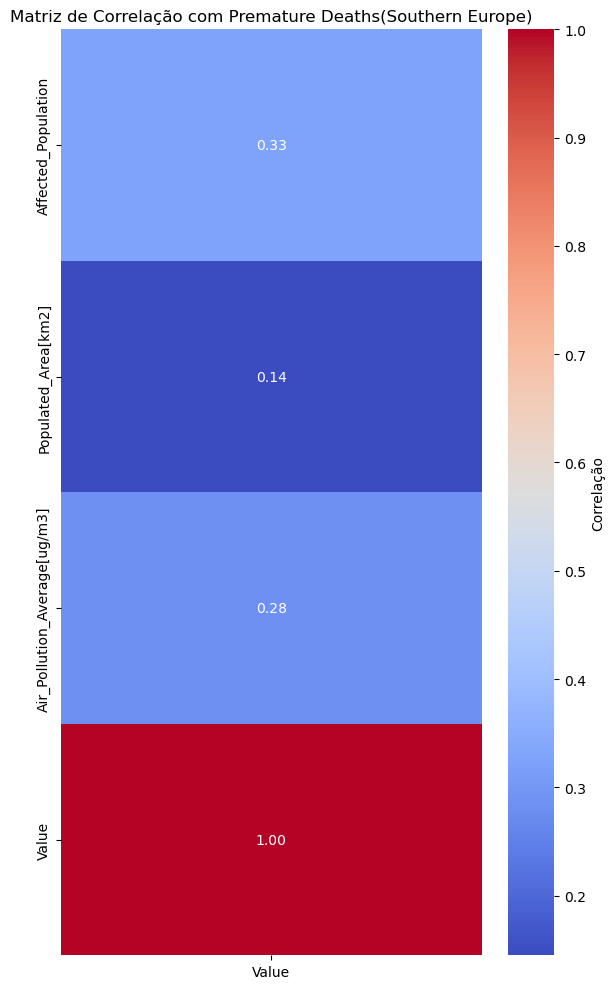

In [23]:
# Calcular matriz de correlação 
corr_matrix = df_southern[colunas_numericas].corr()


# Mostrar heatmap da matriz de correlação completa para contextualização
plt.figure(figsize=(6, 10))
sns.heatmap(corr_matrix[['Value']], annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlação'})
plt.title('Matriz de Correlação com Premature Deaths(Southern Europe)')
plt.tight_layout()
plt.show()




Fold 1: MAE = 39.2259, RMSE = 55.7604
Fold 2: MAE = 37.3214, RMSE = 51.2918
Fold 3: MAE = 40.3123, RMSE = 57.3034
Fold 4: MAE = 39.6771, RMSE = 56.0195
Fold 5: MAE = 40.9335, RMSE = 57.7847

===== Resultados (K-Fold = 5) =====
MAE médio nos folds:   39.4941
RMSE médio nos folds:  55.6320
-----
MAE global (todos os pontos):   39.4941
RMSE global (todos os pontos):  55.6795

Função linear final (ajustada em todo o dataset):
Premature_Deaths = 20.1958 + 0.0001 * Affected_Population


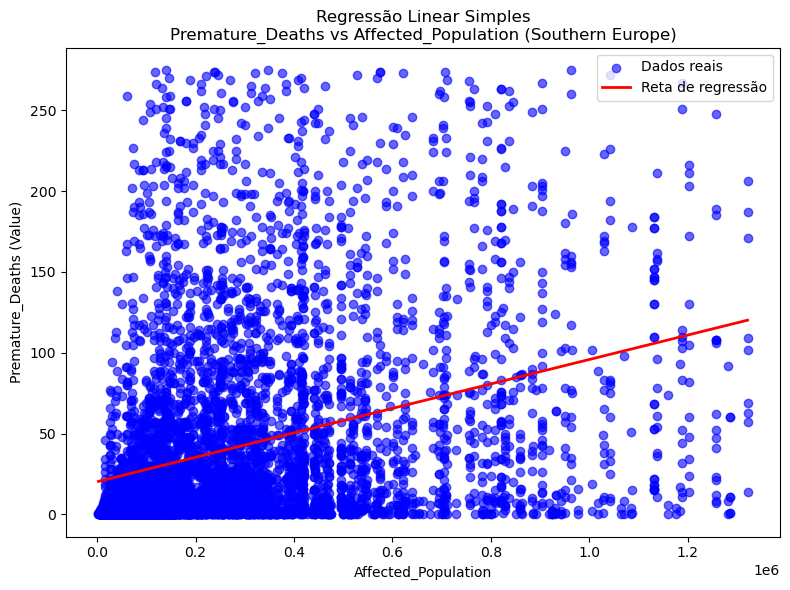

In [24]:
# 4.2.2 Modelo de regressõa linear simples para prever a variável Premature_Deaths com base na variável Affected_Population

# Preparar X e y

#    X = Affected_Population, y = Value (Premature_Deaths)
X = df_southern[['Affected_Population']].values  # formato (n_samples, 1)
y = df_southern['Value'].values                   # formato (n_samples,)


# Configurar K-Fold Cross-Validation (k = 5)
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Listas para armazenar erros de cada fold
mae_folds = []
rmse_folds = []

# Vamos também coletar as previsões para cada índice de teste, para calcular métricas globais
y_pred_full = np.zeros_like(y)
y_true_full = np.zeros_like(y)


# Loop pelos folds: treinar e avaliar

for fold_index, (train_index, test_index) in enumerate(kf.split(X)):
    # Dividir treino / teste
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Ajustar modelo de regressão linear simples
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Prever no conjunto de teste
    y_pred = model.predict(X_test)
    
    # Armazenar previsões para métricas globais
    y_pred_full[test_index] = y_pred
    y_true_full[test_index] = y_test
    
    # Calcular MAE e RMSE para este fold
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    mae_folds.append(mae)
    rmse_folds.append(rmse)
    
    print(f"Fold {fold_index + 1}: MAE = {mae:.4f}, RMSE = {rmse:.4f}")


# Erros Médios nos k Folds + Erro “Global” usando y_pred_full vs y_true_full
mae_media = np.mean(mae_folds)
rmse_media = np.mean(rmse_folds)

mae_global = mean_absolute_error(y_true_full, y_pred_full)
rmse_global = np.sqrt(mean_squared_error(y_true_full, y_pred_full))

print("\n===== Resultados (K-Fold = 5) =====")
print(f"MAE médio nos folds:   {mae_media:.4f}")
print(f"RMSE médio nos folds:  {rmse_media:.4f}")
print(f"-----")
print(f"MAE global (todos os pontos):   {mae_global:.4f}")
print(f"RMSE global (todos os pontos):  {rmse_global:.4f}")

# Ajustar modelo final em todo o conjunto para obter a função linear
final_model = LinearRegression()
final_model.fit(X, y)

intercepto = final_model.intercept_
coef = final_model.coef_[0]

print("\nFunção linear final (ajustada em todo o dataset):")
print(f"Premature_Deaths = {intercepto:.4f} + {coef:.4f} * Affected_Population")



# Visualizar diagrama de dispersão + reta de regressão

plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', alpha=0.6, label='Dados reais')

# Criar uma sequência de valores de Affected_Population para plotar a reta
x_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_line = final_model.predict(x_line)

plt.plot(x_line, y_line, color='red', linewidth=2, label='Reta de regressão')
plt.title('Regressão Linear Simples\nPremature_Deaths vs Affected_Population (Southern Europe)')
plt.xlabel('Affected_Population')
plt.ylabel('Premature_Deaths (Value)')
plt.legend()
plt.tight_layout()
plt.show()

In [25]:
# 4.2.3 Modelos para prever a variável Premature_Deaths

k = 5
kf = KFold(n_splits=5, shuffle=True, random_state=42)

features = [
    'Affected_Population',
    'Air_Pollution_Average[ug/m3]',
    'Populated_Area[km2]'
]

# Preparar X e y
# X = todas as features (df_southern[features]), y = df_southern['Value'] (Premature_Deaths)
X = df_southern[features].values       # formato (n_samples, n_features)
y = df_southern['Value'].values        # formato (n_samples,)

# Normalização para todos os modelos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


==== a) Regressão Linear Múltipla ====

Fold 1: MAE = 36.1998, RMSE = 52.4594
Fold 2: MAE = 34.5114, RMSE = 49.2188
Fold 3: MAE = 37.6919, RMSE = 55.2490
Fold 4: MAE = 37.2120, RMSE = 53.7160
Fold 5: MAE = 38.1316, RMSE = 55.5803

===== Resultados Regressão Linear Múltipla (K-Fold = 5) =====
MAE médio nos folds:   36.7493
RMSE médio nos folds:  53.2447
-----
MAE global (todos os pontos):   36.7493
RMSE global (todos os pontos):  53.2945

Coeficientes finais (ajustados em todo o dataset):
  Affected_Population: 18.5753
  Air_Pollution_Average[ug/m3]: 16.2464
  Populated_Area[km2]: 0.5961
Intercepto: 41.4737


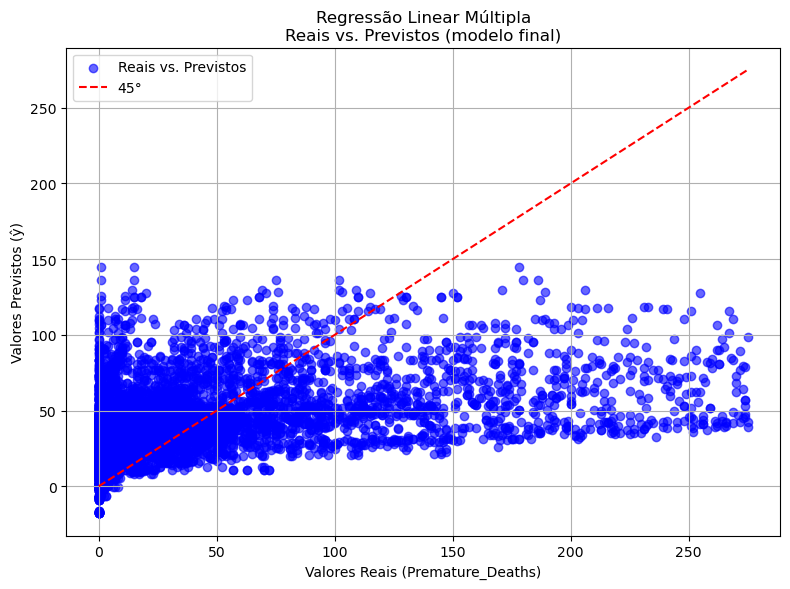

In [26]:
print("==== a) Regressão Linear Múltipla ====\n")

# Listas para armazenar o MAE e RMSE de cada fold
mae_folds_lr = []
rmse_folds_lr = []

# Vetores para predições “globais”
y_pred_full_lr = np.zeros_like(y, dtype=float)
y_true_full_lr = np.zeros_like(y, dtype=float)

# Loop de K-Fold
for fold_index, (train_index, test_index) in enumerate(kf.split(X_scaled), start=1):
    
    # Dividir em treino e teste
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Instanciar e treinar o modelo
    model_lr = LinearRegression()
    model_lr.fit(X_train, y_train)
      #
    # Prever os valores de teste 
    y_pred = model_lr.predict(X_test)
    
    # Armazenar predições para métricas globais
    y_pred_full_lr[test_index] = y_pred
    y_true_full_lr[test_index] = y_test

    # Calcular e guardar MAE e RMSE deste fold
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    mae_folds_lr.append(mae)
    rmse_folds_lr.append(rmse)

    print(f"Fold {fold_index}: MAE = {mae:.4f}, RMSE = {rmse:.4f}")
    

# Métricas médias por fold
mae_media_lr = np.mean(mae_folds_lr)
rmse_media_lr = np.mean(rmse_folds_lr)

# Métrica “global” (todas as predições de validação juntas)
mae_global_lr = mean_absolute_error(y_true_full_lr, y_pred_full_lr)
rmse_global_lr = np.sqrt(mean_squared_error(y_true_full_lr, y_pred_full_lr))

print("\n===== Resultados Regressão Linear Múltipla (K-Fold = 5) =====")
print(f"MAE médio nos folds:   {mae_media_lr:.4f}")
print(f"RMSE médio nos folds:  {rmse_media_lr:.4f}")
print("-----")
print(f"MAE global (todos os pontos):   {mae_global_lr:.4f}")
print(f"RMSE global (todos os pontos):  {rmse_global_lr:.4f}")

# Ajustar modelo final em 100% dos dados para obter coeficientes definitivos
final_model_lr = LinearRegression()
final_model_lr.fit(X_scaled, y)
intercepto_lr = final_model_lr.intercept_
coefs_lr = final_model_lr.coef_





print("\nCoeficientes finais (ajustados em todo o dataset):")
for feat, coef in zip(features, coefs_lr):
    print(f"  {feat}: {coef:.4f}")
print(f"Intercepto: {intercepto_lr:.4f}")

# Plot: reais vs. previstos (modelo final)
y_pred_fullmodel_lr = final_model_lr.predict(X_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred_fullmodel_lr, color='blue', alpha=0.6, label='Reais vs. Previstos')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='45°')
plt.xlabel("Valores Reais (Premature_Deaths)")
plt.ylabel("Valores Previstos (ŷ)")
plt.title("Regressão Linear Múltipla\nReais vs. Previstos (modelo final)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



==== b) Árvore de Regressão ====

Melhores parâmetros da árvore: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Fold 1: MAE = 35.1096, RMSE = 51.2211
Fold 2: MAE = 33.0810, RMSE = 48.7678
Fold 3: MAE = 36.0848, RMSE = 54.0447
Fold 4: MAE = 36.5198, RMSE = 53.4291
Fold 5: MAE = 35.9942, RMSE = 53.5838

===== Resultados Árvore de Regressão (K-Fold = 5) =====
MAE médio nos folds:   35.3579
RMSE médio nos folds:  52.2093
-----
MAE global (todos os pontos):   35.3579
RMSE global (todos os pontos):  52.2468


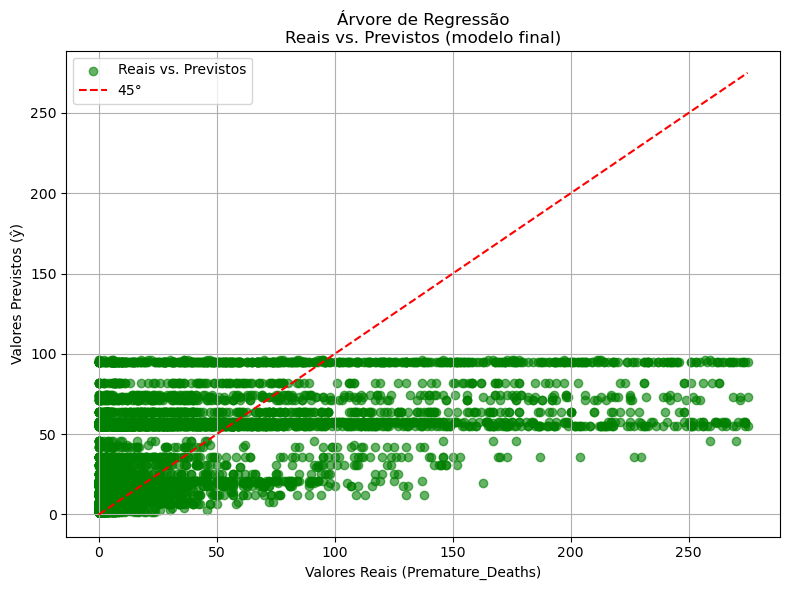

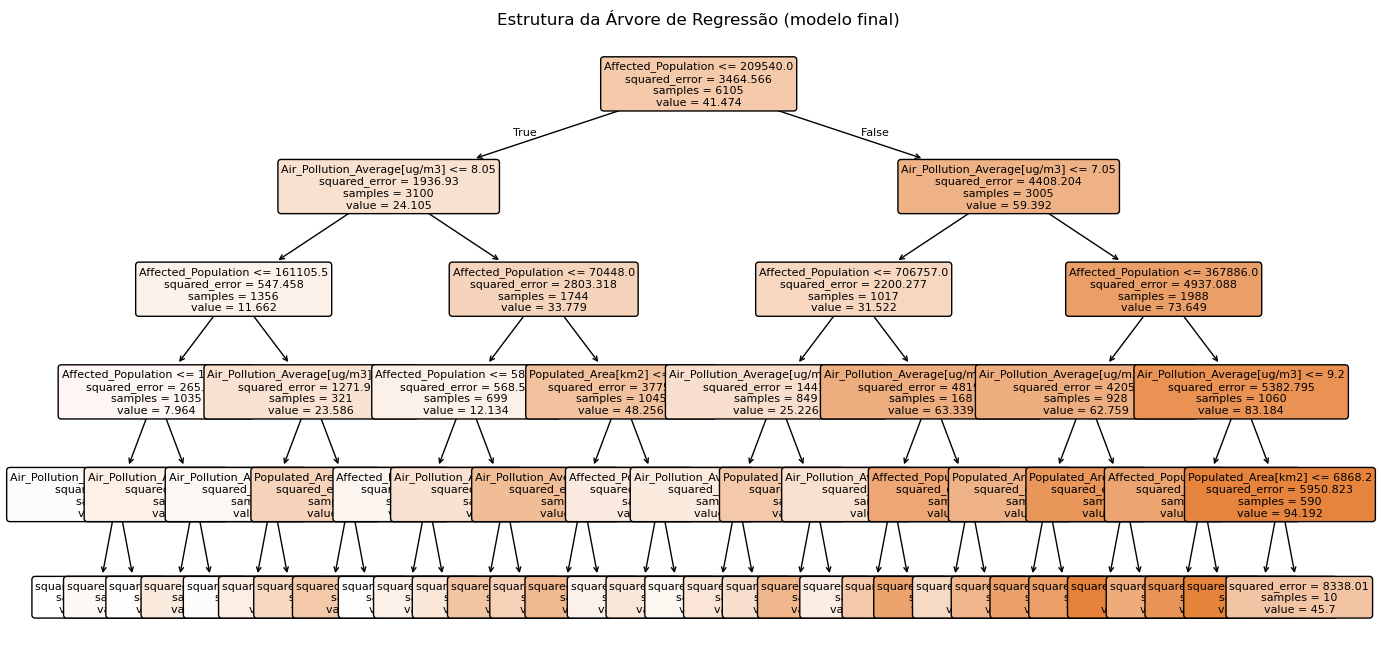

In [27]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print("\n==== b) Árvore de Regressão ====\n")

tree_param_grid = {
    'max_depth': [3, 5, 7, 9, 11],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
# GridSearchCV com validação cruzada (sem necessidade de scaling)
grid_tree = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid=tree_param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)

X = df_southern[features].values # Dados sem scaling
# Listas para armazenar os erros (MAE e RMSE) em cada fold
mae_folds_tree = []
rmse_folds_tree = []

# Vetores para armazenar predições “globais”
y_pred_full_tree = np.zeros_like(y, dtype=float)
y_true_full_tree = np.zeros_like(y, dtype=float)

# Parâmetros de exemplo - sinta-se à vontade para otimizar depois
max_depth = 9
min_samples_split = 5
min_samples_leaf = 1

# Ajustar nos dados sem normalização
grid_tree.fit(X, y)


# Guardar os melhores parâmetros encontrados
best_tree_params = grid_tree.best_params_
print("Melhores parâmetros da árvore:", best_tree_params)

# Loop de validação cruzada
for fold_index, (train_index, test_index) in enumerate(kf.split(X_scaled), start=1):

    # Preparar conjuntos de treino e teste para este fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Instanciar o regressor de árvore para este fold
    model_tree = DecisionTreeRegressor(
         **best_tree_params,
        random_state=42
    )
    
    # Treinar e obter predições
    model_tree.fit(X_train, y_train)
    y_pred = model_tree.predict(X_test)

    # Armazenar predição para cálculo global
    y_pred_full_tree[test_index] = y_pred
    y_true_full_tree[test_index] = y_test

    # Calcular e guardar as métricas deste fold
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    mae_folds_tree.append(mae)
    rmse_folds_tree.append(rmse)

    print(f"Fold {fold_index}: MAE = {mae:.4f}, RMSE = {rmse:.4f}")

# Cálculo das métricas médias e globai
mae_media_tree = np.mean(mae_folds_tree)
rmse_media_tree = np.mean(rmse_folds_tree)

mae_global_tree = mean_absolute_error(y_true_full_tree, y_pred_full_tree)
rmse_global_tree = np.sqrt(mean_squared_error(y_true_full_tree, y_pred_full_tree))

print("\n===== Resultados Árvore de Regressão (K-Fold = 5) =====")
print(f"MAE médio nos folds:   {mae_media_tree:.4f}")
print(f"RMSE médio nos folds:  {rmse_media_tree:.4f}")
print("-----")
print(f"MAE global (todos os pontos):   {mae_global_tree:.4f}")
print(f"RMSE global (todos os pontos):  {rmse_global_tree:.4f}")

# Ajustar árvore final em 100% dos dados
final_model_tree = DecisionTreeRegressor(
    **best_tree_params,
    random_state=42
)
final_model_tree.fit(X, y)

# Plot: reais vs. previstos (modelo final)
y_pred_fullmodel_tree = final_model_tree.predict(X)
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred_fullmodel_tree, color='green', alpha=0.6, label='Reais vs. Previstos')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='45°')
plt.xlabel("Valores Reais (Premature_Deaths)")
plt.ylabel("Valores Previstos (ŷ)")
plt.title("Árvore de Regressão\nReais vs. Previstos (modelo final)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot da estrutura da árvore final
plt.figure(figsize=(16, 8))
plot_tree(
    final_model_tree,
    feature_names=features,
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("Estrutura da Árvore de Regressão (modelo final)")
plt.show()



==== c) SVM ====

Melhores parâmetros encontrados: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Fold 1: MAE = 32.5839, RMSE = 55.6924
Fold 2: MAE = 28.6761, RMSE = 49.6154
Fold 3: MAE = 33.6574, RMSE = 57.6964
Fold 4: MAE = 32.9565, RMSE = 55.9380
Fold 5: MAE = 33.3833, RMSE = 56.8292

===== Resultados SVM (K-Fold = 5) =====
MAE médio nos folds:   32.2514
RMSE médio nos folds:  55.1543
-----
MAE global (todos os pontos):   32.2514
RMSE global (todos os pontos):  55.2283


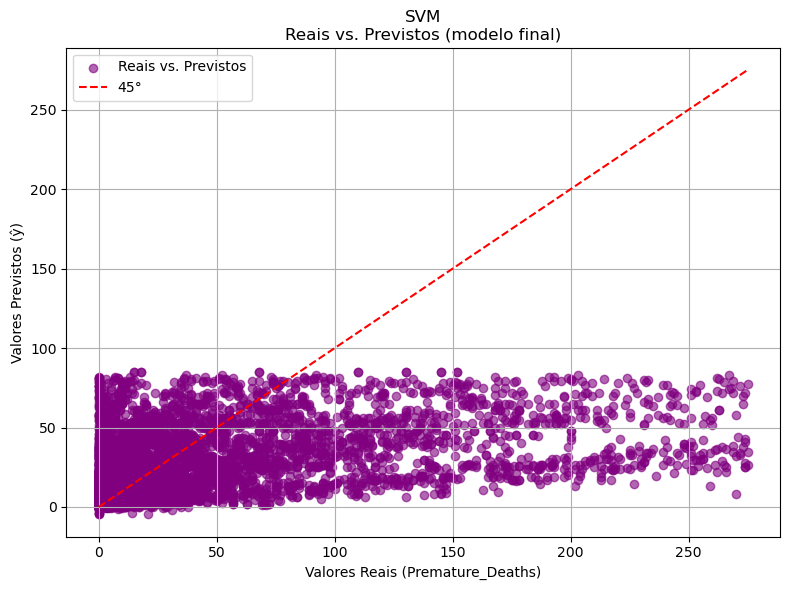

In [28]:
print("\n==== c) SVM ====\n")

# Listas para armazenar os erros (MAE e RMSE) em cada fold
mae_folds_svm = []
rmse_folds_svm = []

# Vetores para armazenar predições “globais” 
y_pred_full_svm = np.zeros_like(y, dtype=float)
y_true_full_svm = np.zeros_like(y, dtype=float)

# Parâmetros de exemplo
#kernel_svm = 'poly'
#C_svm = 10
svm_param_grid = [
      {'kernel': ['linear'], 'C': [10]},
    {'kernel': ['rbf'], 'C': [10], 'gamma': ['scale']},
    {'kernel': ['poly'], 'C': [10], 'degree': [3], 'gamma': ['scale']}
]

grid_svm = GridSearchCV(
    SVR(),
    svm_param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)

# Ajustar aos dados para obter os melhores parâmetros
grid_svm.fit(X_scaled, y)
best_svm_params = grid_svm.best_params_
print("Melhores parâmetros encontrados:", best_svm_params)
# Loop de validação cruzada
for fold_index, (train_index, test_index) in enumerate(kf.split(X_scaled), start=1):

    # Dividir em treino e teste para este fold
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Instanciar modelo SVR para este fold
    model_svm = SVR(**best_svm_params)

    # Treinar e prever
    model_svm.fit(X_train, y_train)
    y_pred = model_svm.predict(X_test)

    # Guardar predição para cálculo global
    y_pred_full_svm[test_index] = y_pred
    y_true_full_svm[test_index] = y_test


    # Calcular e armazenar as métricas deste fold
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    mae_folds_svm.append(mae)
    rmse_folds_svm.append(rmse)

    print(f"Fold {fold_index}: MAE = {mae:.4f}, RMSE = {rmse:.4f}")

# Cálculo das métricas médias e globais 
mae_media_svm = np.mean(mae_folds_svm)
rmse_media_svm = np.mean(rmse_folds_svm)

mae_global_svm = mean_absolute_error(y_true_full_svm, y_pred_full_svm)
rmse_global_svm = np.sqrt(mean_squared_error(y_true_full_svm, y_pred_full_svm))

print("\n===== Resultados SVM (K-Fold = 5) =====")
print(f"MAE médio nos folds:   {mae_media_svm:.4f}")
print(f"RMSE médio nos folds:  {rmse_media_svm:.4f}")
print("-----")
print(f"MAE global (todos os pontos):   {mae_global_svm:.4f}")
print(f"RMSE global (todos os pontos):  {rmse_global_svm:.4f}")

# Ajustar SVR final em 100% dos dados
final_model_svm = SVR(**best_svm_params)
final_model_svm.fit(X_scaled, y)

# Plot: reais vs. previstos (modelo final)
y_pred_fullmodel_svm = final_model_svm.predict(X_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred_fullmodel_svm, color='purple', alpha=0.6, label='Reais vs. Previstos')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='45°')
plt.xlabel("Valores Reais (Premature_Deaths)")
plt.ylabel("Valores Previstos (ŷ)")
plt.title("SVM\nReais vs. Previstos (modelo final)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


==== d) Rede Neuronal MLP ====

Melhores parâmetros MLP: {'activation': 'tanh', 'hidden_layer_sizes': (50, 30), 'max_iter': 5000, 'solver': 'adam'}
Fold 1: MAE = 35.2734, RMSE = 52.2164
Fold 2: MAE = 32.9892, RMSE = 48.3976
Fold 3: MAE = 35.1852, RMSE = 53.1414
Fold 4: MAE = 35.4805, RMSE = 52.0984
Fold 5: MAE = 35.6252, RMSE = 53.5150

===== Resultados Rede Neuronal MLP (K-Fold = 5) =====
MAE médio nos folds:   34.9107
RMSE médio nos folds:  51.8738
-----
MAE global (todos os pontos):   34.9107
RMSE global (todos os pontos):  51.9057


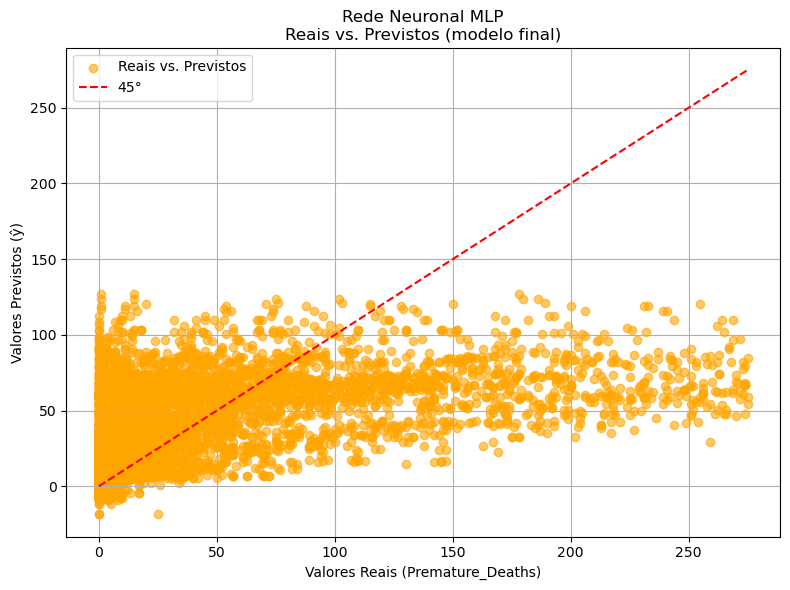

In [29]:
print("\n==== d) Rede Neuronal MLP ====\n")

# Testamos diferentes estruturas de camadas e funções de ativação
mlp_param_grid = {
    'hidden_layer_sizes': [(10,), (50,), (10, 10), (50, 30)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'max_iter': [5000]
}
# Criar e ajustar o GridSearchCV com validação cruzada
grid_mlp = GridSearchCV(
    MLPRegressor(learning_rate='adaptive', early_stopping=True, random_state=42),
    mlp_param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)

# Listas para armazenar os erros (MAE e RMSE) em cada fold
mae_folds_mlp = []
rmse_folds_mlp = []

# Vetores para armazenar predições “globais”
y_pred_full_mlp = np.zeros_like(y, dtype=float)
y_true_full_mlp = np.zeros_like(y, dtype=float)

# Parâmetros de exemplo
hidden_layers = (4, 5, 6)
activation = 'relu'
solver = 'adam'
max_iter_mlp = 20000

# Ajustar o GridSearch aos dados normalizados
grid_mlp.fit(X_scaled, y)

# Extrair os melhores parâmetros encontrados
best_mlp_params = grid_mlp.best_params_
print("Melhores parâmetros MLP:", best_mlp_params)

# Loop de validação cruzada
for fold_index, (train_index, test_index) in enumerate(kf.split(X_scaled), start=1):
    
    # Dividir em treino e teste para este fold
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Instanciar modelo MLP para este fold
    model_mlp = MLPRegressor(
         **best_mlp_params,
    learning_rate='adaptive',
    early_stopping=True,
    random_state=42
    )

    # Treinar e prever
    model_mlp.fit(X_train, y_train)
    y_pred = model_mlp.predict(X_test)

    # Guardar predição para cálculo global
    y_pred_full_mlp[test_index] = y_pred
    y_true_full_mlp[test_index] = y_test

    # Calcular e armazenar as métricas deste fold
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    mae_folds_mlp.append(mae)
    rmse_folds_mlp.append(rmse)

    print(f"Fold {fold_index}: MAE = {mae:.4f}, RMSE = {rmse:.4f}")


# Cálculo das métricas médias e globais 
mae_media_mlp = np.mean(mae_folds_mlp)
rmse_media_mlp = np.mean(rmse_folds_mlp)

mae_global_mlp = mean_absolute_error(y_true_full_mlp, y_pred_full_mlp)
rmse_global_mlp = np.sqrt(mean_squared_error(y_true_full_mlp, y_pred_full_mlp))

print("\n===== Resultados Rede Neuronal MLP (K-Fold = 5) =====")
print(f"MAE médio nos folds:   {mae_media_mlp:.4f}")
print(f"RMSE médio nos folds:  {rmse_media_mlp:.4f}")
print("-----")
print(f"MAE global (todos os pontos):   {mae_global_mlp:.4f}")
print(f"RMSE global (todos os pontos):  {rmse_global_mlp:.4f}")

# Ajustar MLP final em 100% dos dados
final_model_mlp = MLPRegressor(
    hidden_layer_sizes=hidden_layers,
    activation=activation,
    solver=solver,
    max_iter=max_iter_mlp,
    learning_rate='adaptive',
    early_stopping=True,
    random_state=42
)
final_model_mlp.fit(X_scaled, y)

# Plot: reais vs. previstos (modelo final)
y_pred_fullmodel_mlp = final_model_mlp.predict(X_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred_fullmodel_mlp, color='orange', alpha=0.6, label='Reais vs. Previstos')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='45°')
plt.xlabel("Valores Reais (Premature_Deaths)")
plt.ylabel("Valores Previstos (ŷ)")
plt.title("Rede Neuronal MLP\nReais vs. Previstos (modelo final)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [30]:
# 4.2.4 Comparar resultados obtidos pelos modelos

results = pd.DataFrame([
    {
      'Model': 'Regressão Linear Múltipla',
      'MAE mean fold': mae_media_lr,
      'RMSE mean fold': rmse_media_lr,
      'MAE global':    mae_global_lr,
      'RMSE global':   rmse_global_lr
    },
    {
      'Model': 'Árvore de Regressão',
      'MAE mean fold': mae_media_tree,
      'RMSE mean fold': rmse_media_tree,
      'MAE global':    mae_global_tree,
      'RMSE global':   rmse_global_tree
    },
    {
      'Model': 'SVM',
      'MAE mean fold': mae_media_svm,
      'RMSE mean fold': rmse_media_svm,
      'MAE global':    mae_global_svm,
      'RMSE global':   rmse_global_svm
    },
    {
      'Model': 'Rede Neuronal MLP',
      'MAE mean fold': mae_media_mlp,
      'RMSE mean fold': rmse_media_mlp,
      'MAE global':    mae_global_mlp,
      'RMSE global':   rmse_global_mlp
    }
])

# exibir em tabela
print(results.to_markdown(index=False))

| Model                     |   MAE mean fold |   RMSE mean fold |   MAE global |   RMSE global |
|:--------------------------|----------------:|-----------------:|-------------:|--------------:|
| Regressão Linear Múltipla |         36.7493 |          53.2447 |      36.7493 |       53.2945 |
| Árvore de Regressão       |         35.3579 |          52.2093 |      35.3579 |       52.2468 |
| SVM                       |         32.2514 |          55.1543 |      32.2514 |       55.2283 |
| Rede Neuronal MLP         |         34.9107 |          51.8738 |      34.9107 |       51.9057 |


In [31]:
import numpy as np
import pandas as pd
from scipy.stats import shapiro, ttest_rel, wilcoxon

# Listas de MAE por fold (dos modelos avaliados anteriormente)
mae_lists = [mae_folds_lr, mae_folds_tree, mae_folds_svm, mae_folds_mlp]
model_names = ['Regressão Linear', 'Árvore de Regressão', 'SVM', 'Rede Neuronal MLP']

# Calcular MAE médio de cada modelo e identificar os dois com melhor desempenho
mae_means = [np.mean(mae) for mae in mae_lists]
sorted_indices = np.argsort(mae_means)
top1_idx, top2_idx = sorted_indices[:2]

top1_name = model_names[top1_idx]
top2_name = model_names[top2_idx]

print("Dois modelos com menor MAE médio:")
print(f"1) {top1_name} — MAE médio: {mae_means[top1_idx]:.2f}")
print(f"2) {top2_name} — MAE médio: {mae_means[top2_idx]:.2f}")

# Obter os valores de MAE por fold dos dois melhores modelos
mae_model_1 = np.array(mae_lists[top1_idx])
mae_model_2 = np.array(mae_lists[top2_idx])

# Mostrar comparação por fold
df_comparacao = pd.DataFrame({
    "Fold": range(1, len(mae_model_1) + 1),
    f"{top1_name} (MAE)": mae_model_1,
    f"{top2_name} (MAE)": mae_model_2
})
print("\nComparação dos MAE por fold:")
print(df_comparacao.to_markdown(index=False))

# Calcular as diferenças por fold
diffs = mae_model_1 - mae_model_2

# Teste de normalidade (Shapiro-Wilk) sobre as diferenças
stat_shapiro, p_shapiro = shapiro(diffs)
print(f"\nTeste de normalidade (Shapiro-Wilk) — p-value: {p_shapiro:.4f}")

alpha = 0.05

# Escolher o teste adequado com base na normalidade
if p_shapiro > alpha:
    print("Diferenças seguem uma distribuição normal. Aplicar teste t de Student (pareado).")
    stat_test, p_val = ttest_rel(mae_model_1, mae_model_2)
    test_name = "t de Student (pareado)"
else:
    print("Diferenças não seguem uma distribuição normal. Aplicar teste de Wilcoxon.")
    stat_test, p_val = wilcoxon(mae_model_1, mae_model_2)
    test_name = "Wilcoxon (não paramétrico)"

# Mostrar resultado do teste escolhido
print(f"\nTeste estatístico: {test_name}")
print(f"Estatística: {stat_test:.4f}")
print(f"P-value:     {p_val:.4f}")

# Conclusão
if p_val < alpha:
    print(f"\nCom α = {alpha}, a diferença é estatisticamente significativa.")
    melhor = top1_name if mae_means[top1_idx] < mae_means[top2_idx] else top2_name
    print(f"O modelo com melhor desempenho (menor MAE) é: {melhor}.")
else:
    print(f"\nCom α = {alpha}, a diferença não é estatisticamente significativa.")
    print(f"Ambos os modelos apresentam desempenho comparável.")


Dois modelos com menor MAE médio:
1) SVM — MAE médio: 32.25
2) Rede Neuronal MLP — MAE médio: 34.91

Comparação dos MAE por fold:
|   Fold |   SVM (MAE) |   Rede Neuronal MLP (MAE) |
|-------:|------------:|--------------------------:|
|      1 |     32.5839 |                   35.2734 |
|      2 |     28.6761 |                   32.9892 |
|      3 |     33.6574 |                   35.1852 |
|      4 |     32.9565 |                   35.4805 |
|      5 |     33.3833 |                   35.6252 |

Teste de normalidade (Shapiro-Wilk) — p-value: 0.4800
Diferenças seguem uma distribuição normal. Aplicar teste t de Student (pareado).

Teste estatístico: t de Student (pareado)
Estatística: -5.7967
P-value:     0.0044

Com α = 0.05, a diferença é estatisticamente significativa.
O modelo com melhor desempenho (menor MAE) é: SVM.


In [32]:
# 4.3.1 — Criar coluna RespDisease
doencas_respiratorias = ['Asthma', 'Chronic obstructive pulmonary disease']
df['RespDisease'] = df['Outcome'].apply(lambda x: 1 if x in doencas_respiratorias else 0)


In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# Remover colunas não numéricas nem relevantes
X = df.drop(columns=['RespDisease', 'Outcome', 'Country', 'Region',
    'NUTS_Code', 'Air_Pollutant'], errors='ignore')
y = df['RespDisease']

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Definir k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)


In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def compute_metrics(model, X, y, kf):
    accs, precs, senss, specs, f1s = [], [], [], [], []
    for train_idx, test_idx in kf.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accs.append(accuracy_score(y_test, y_pred))
        precs.append(precision_score(y_test, y_pred, zero_division=0))
        senss.append(recall_score(y_test, y_pred, pos_label=1))
        specs.append(recall_score(y_test, y_pred, pos_label=0))
        f1s.append(f1_score(y_test, y_pred))

    return accs, precs, senss, specs, f1s

In [35]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Inicializar o modelo com parâmetros (podes ajustar)
model_dt = DecisionTreeClassifier(
    max_depth=4,
    min_samples_split=2,
    min_samples_leaf=1,
    criterion='gini',
    random_state=42
)

# Avaliação com K-Fold
dt_metrics = compute_metrics(model_dt, X_scaled, y, kf)

# Resultados médios ± std
print("\n===== Árvore de Decisão: Métricas (média ± std) =====")
print(f"Accuracy:    {np.mean(dt_metrics[0]):.3f} ± {np.std(dt_metrics[0]):.3f}")
print(f"Precision:   {np.mean(dt_metrics[1]):.3f} ± {np.std(dt_metrics[1]):.3f}")
print(f"Sensitivity: {np.mean(dt_metrics[2]):.3f} ± {np.std(dt_metrics[2]):.3f}")
print(f"Specificity: {np.mean(dt_metrics[3]):.3f} ± {np.std(dt_metrics[3]):.3f}")
print(f"F1 Score:    {np.mean(dt_metrics[4]):.3f} ± {np.std(dt_metrics[4]):.3f}")



===== Árvore de Decisão: Métricas (média ± std) =====
Accuracy:    0.762 ± 0.002
Precision:   0.797 ± 0.008
Sensitivity: 0.445 ± 0.009
Specificity: 0.937 ± 0.002
F1 Score:    0.571 ± 0.009


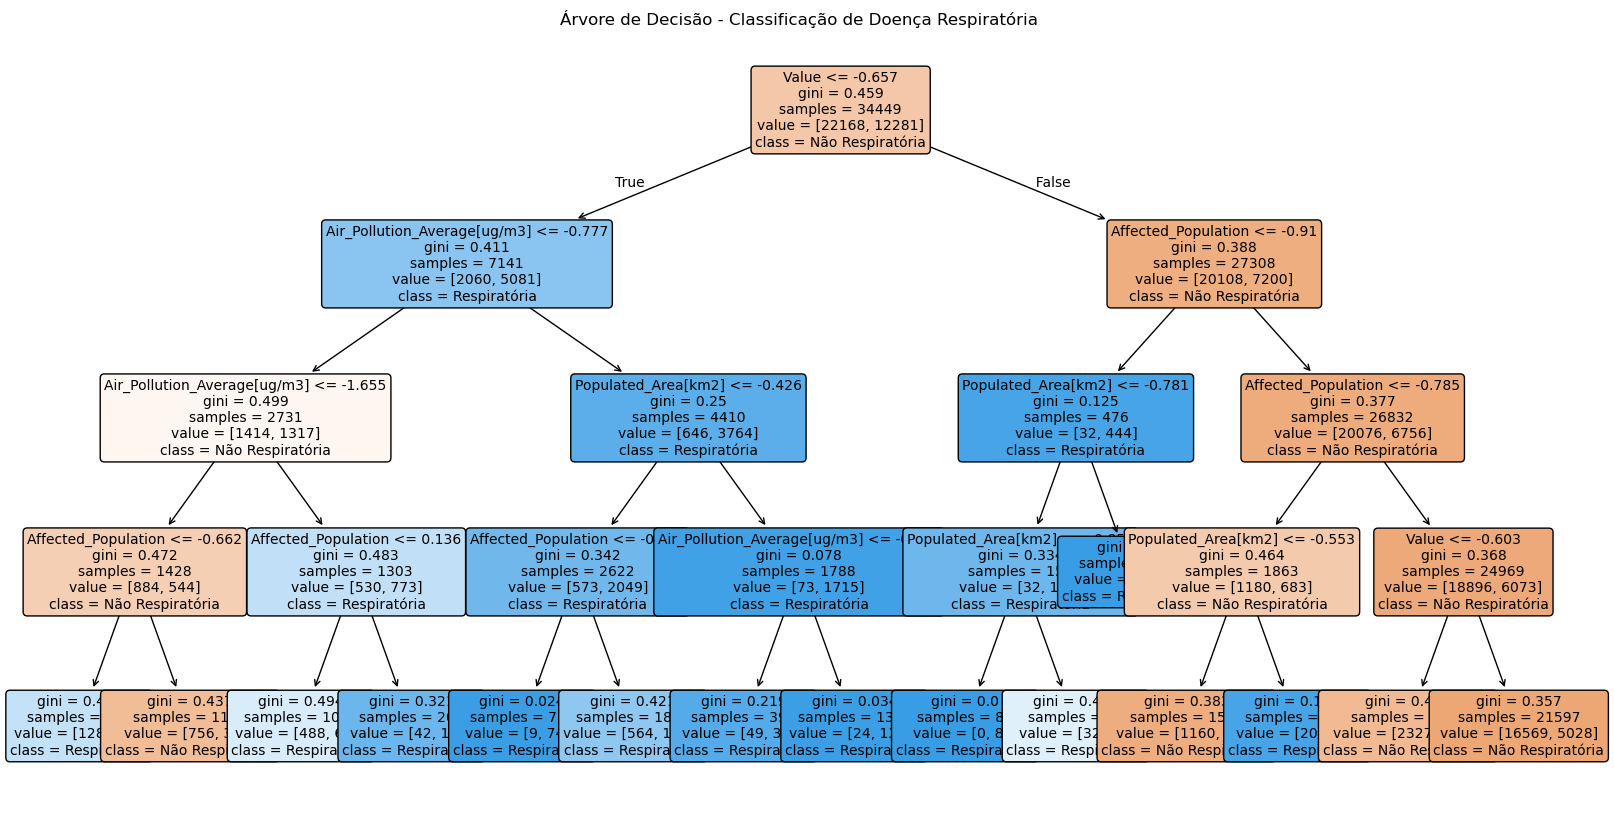

In [36]:
# Treinar árvore no dataset completo
model_dt.fit(X_scaled, y)

# Visualizar
plt.figure(figsize=(20, 10))
plot_tree(
    model_dt,
    feature_names=X.columns,
    class_names=['Não Respiratória', 'Respiratória'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Árvore de Decisão - Classificação de Doença Respiratória")
plt.show()

In [37]:
# 4.3.2 b)

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
import numpy as np

from sklearn.preprocessing import StandardScaler

# definir features e label
x = df.drop(columns=['RespDisease', 'Outcome', 'Country', 'Region',
    'NUTS_Code', 'Air_Pollutant'], errors='ignore')
y = df['RespDisease']

sc = StandardScaler()
x_scaled = sc.fit_transform(x)

# criar o modelo
model_mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=2000,
    random_state=42
)

# definir o K-Fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Calcular as métricas com K-Fold
mlp_metrics = compute_metrics(model_mlp, x_scaled, y, kf)

# Mostrar a accuracy de cada fold
print("\n===== Accuracy por Fold =====")
for i, acc in enumerate(mlp_metrics[0], start=1):
    print(f"Fold {i}: {acc:.3f}")

# apresentar resultados
print("\n===== Rede Neural (MLP): Métricas (média ± std) =====")
print(f"Accuracy:    {np.mean(mlp_metrics[0]):.3f} ± {np.std(mlp_metrics[0]):.3f}")
print(f"Precision:   {np.mean(mlp_metrics[1]):.3f} ± {np.std(mlp_metrics[1]):.3f}")
print(f"Sensitivity: {np.mean(mlp_metrics[2]):.3f} ± {np.std(mlp_metrics[2]):.3f}")
print(f"Specificity: {np.mean(mlp_metrics[3]):.3f} ± {np.std(mlp_metrics[3]):.3f}")
print(f"F1 Score:    {np.mean(mlp_metrics[4]):.3f} ± {np.std(mlp_metrics[4]):.3f}")


===== Accuracy por Fold =====
Fold 1: 0.799
Fold 2: 0.799
Fold 3: 0.792
Fold 4: 0.796
Fold 5: 0.798

===== Rede Neural (MLP): Métricas (média ± std) =====
Accuracy:    0.797 ± 0.003
Precision:   0.821 ± 0.029
Sensitivity: 0.552 ± 0.024
Specificity: 0.932 ± 0.017
F1 Score:    0.659 ± 0.007


In [ ]:
# 4.3.2 c)

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# definir features e label
x = df.drop(columns=['RespDisease', 'Outcome', 'Country', 'Region',
    'NUTS_Code', 'Air_Pollutant'], errors='ignore')
y = df['RespDisease']

# dividir sample em componente de treino e compnente de teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# criar instancia do classificador SVM
clf = SVC(kernel='linear')

# treinar o classificador
clf.fit(x_train, y_train)

# fazer previsões
predictions = clf.predict(x_test)

# avaliar modelo 
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)         
f1 = f1_score(y_test, predictions)

tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
specificity = tn / (tn + fp)

# resultados
print("Accuracy:    ", round(accuracy, 3))
print("Precision:   ", round(precision, 3))
print("Sensitivity: ", round(recall, 3))
print("Specificity: ", round(specificity, 3))
print("F1 Score:    ", round(f1, 3))

hello


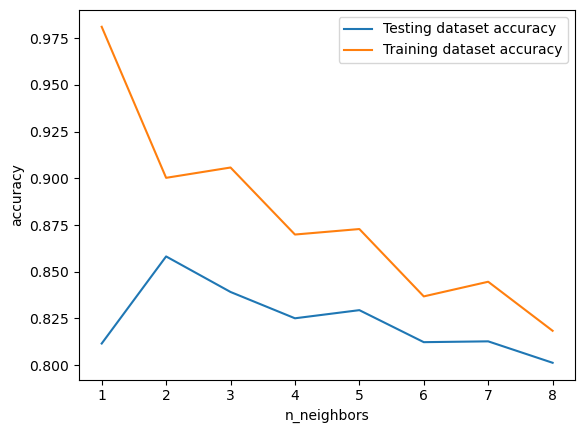

In [38]:
# 4.3.2 d)
print('hello')
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# definir features e label
x = df.drop(columns=['RespDisease', 'Outcome', 'Country', 'Region',
    'NUTS_Code', 'Air_Pollutant'], errors='ignore')
y = df['RespDisease']

# dividir sample em componente de treino e compnente de teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# antes de criar o modelo, vamos escolher um valor apropriado para k
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# fazer um ciclo para os diferentes números de vizinhos e obter accuracy de cada um
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors = k )
    knn.fit(x_train, y_train)
    # verificar accuracy de treino e de teste
    train_accuracy[i] = knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_test, y_test)

# criar um gráfico para identificar qual o número de vizinhos mais adequado
plt.plot(neighbors, test_accuracy, label = 'Testing dataset accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset accuracy')
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.show()

In [39]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# listas para guardar as métricas
accuracies = []
all_y_true = []
all_y_pred = []

# loop sobre os folds
for fold, (train_index, test_index) in enumerate(skf.split(x, y), start=1):
    x_train_fold, x_test_fold = x.iloc[train_index], x.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    
    # normalizar os dados do fold
    sc = StandardScaler()
    x_train_std = sc.fit_transform(x_train_fold)
    x_test_std = sc.transform(x_test_fold)
    
    # treinar modelo
    knn = KNeighborsClassifier(n_neighbors=2, p=2, weights='uniform', algorithm='auto')
    knn.fit(x_train_std, y_train_fold)
    
    # prever
    y_pred_fold = knn.predict(x_test_std)
    acc = accuracy_score(y_test_fold, y_pred_fold)
    accuracies.append(acc)

    all_y_true.extend(y_test_fold)
    all_y_pred.extend(y_pred_fold)

    print(f"Fold {fold}: Accuracy = {acc:.3f}")

# resultados finais
print("\n=== Resultados Finais ===")
print(f"Média de Accuracy: {np.mean(accuracies):.3f}")
print("Classification Report (agregado):")
print(classification_report(all_y_true, all_y_pred))


Fold 1: Accuracy = 0.787
Fold 2: Accuracy = 0.788
Fold 3: Accuracy = 0.793
Fold 4: Accuracy = 0.784
Fold 5: Accuracy = 0.790

=== Resultados Finais ===
Média de Accuracy: 0.788
Classification Report (agregado):
              precision    recall  f1-score   support

           0       0.77      0.95      0.85     22168
           1       0.85      0.49      0.62     12281

    accuracy                           0.79     34449
   macro avg       0.81      0.72      0.74     34449
weighted avg       0.80      0.79      0.77     34449



In [40]:
from scipy.stats import ttest_rel

# guardar os valores obtidos das accuracies do modelo de rede neuronal e de k-nearest neighbors
accs_neighbors = [0.787, 0.788, 0.793, 0.784, 0.790]
accs_rede = [0.799, 0.799, 0.792, 0.796, 0.798]

t_stat, p_val = ttest_rel(accs_rede, accs_neighbors)

print(f"p-value: {p_val}")

# como temos p-value < 0.05, podemos afirmar que existe diferença significativa entre os dois modelos

p-value: 0.026971120907447667
